In [44]:
import pandas as pd

file_path = '/Users/evansweeney/Desktop/492_project_local/cmse492_project/data/raw/ghcnh-station-list.csv'

# Load the CSV file, skipping the first row
df = pd.read_csv(file_path, on_bad_lines='skip', skiprows=1)

# Rename columns to 'station', 'Latitude', 'Longitude'
df.columns = ['station', 'Latitude', 'Longitude'] + list(df.columns[3:])

# Select the name, latitude, and longitude columns
df_lat_lon = df[['station', 'Latitude', 'Longitude']]

# Display the first few rows
df_lat_lon.head()

,station,Latitude,Longitude
0,ACU55-00189,18.6,-63.47
1,ACU55-00190,18.6,-63.47
2,ACU55-00191,18.6,-63.47
3,ACU55-00192,18.6,-63.47
4,ACU55-00193,18.6,-63.47


In [45]:
lat_min, lat_max = 36.9931, 40.0031
lon_min, lon_max = -102.0517, -94.5884

# Filter for rows within Kansas latitude and longitude range
kansas_stations = df_lat_lon[
    (df_lat_lon['Latitude'] >= lat_min) & (df_lat_lon['Latitude'] <= lat_max) &
    (df_lat_lon['Longitude'] >= lon_min) & (df_lat_lon['Longitude'] <= lon_max)
]

# Display the filtered DataFrame
print(kansas_stations)

           station  Latitude  Longitude
19389  USA00749094   38.7000   -96.8170
19992  USC00140326   37.8894   -98.1785
19993  USC00140441   39.6980  -101.0039
19994  USC00140637   37.6557   -96.5352
19995  USC00140750   37.8923   -97.4827
...            ...       ...        ...
25490  USW00093967   37.0911   -95.5725
25492  USW00093978   37.7017   -98.7469
25495  USW00093982   37.6833   -97.3333
25503  USW00093990   39.3742   -99.8300
25509  USW00093997   38.8725   -98.8092

[146 rows x 3 columns]


Available columns in kansas_map:
Index(['featurecla', 'scalerank', 'adm1_code', 'diss_me', 'iso_3166_2',
       'wikipedia', 'iso_a2', 'adm0_sr', 'name', 'name_alt',
       ...
       'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT', 'FCLASS_NL',
       'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'FCLASS_TLC', 'geometry'],
      dtype='object', length=122)

First few rows of kansas_map:
           featurecla  scalerank adm1_code  diss_me iso_3166_2  \
0  Admin-1 scale rank          2  USA-3514     3514      US-MN   
1  Admin-1 scale rank          2  USA-3515     3515      US-MT   
2  Admin-1 scale rank          2  USA-3516     3516      US-ND   
3  Admin-1 scale rank          2  USA-3517     3517      US-HI   
4  Admin-1 scale rank          2  USA-3518     3518      US-ID   

                                   wikipedia iso_a2  adm0_sr          name  \
0     http://en.wikipedia.org/wiki/Minnesota     US        1     Minnesota   
1       http://en.wikipedia.org/wiki/Montana     US        1

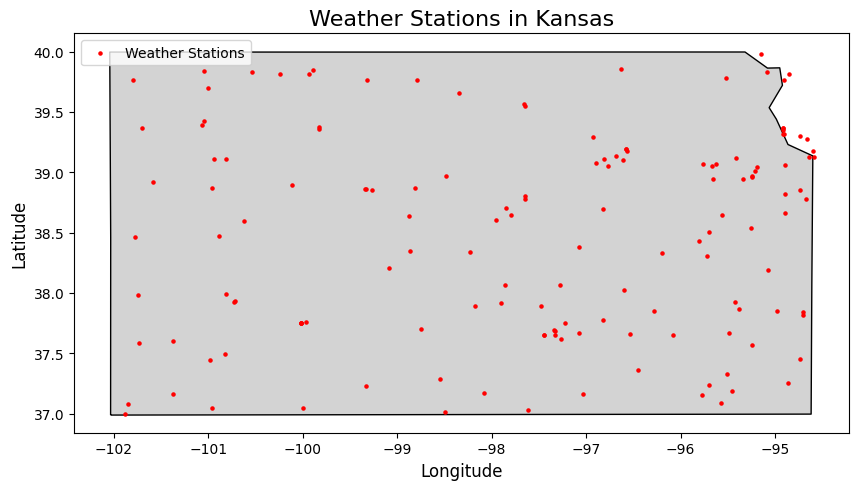

In [46]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named merged_df
# Extract unique stations based on latitude and longitude
unique_stations = kansas_stations[['station', 'Latitude', 'Longitude']].drop_duplicates()

# Convert the DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(
    unique_stations, 
    geometry=gpd.points_from_xy(unique_stations['Longitude'], unique_stations['Latitude']),
    crs="EPSG:4326"  # Assuming your latitude and longitude are in WGS84
)

# Load the base map from the shapefile
kansas_map = gpd.read_file('/Users/evansweeney/Desktop/492_project_local/cmse492_project/data/raw/ne_110m_admin_1_states_provinces/ne_110m_admin_1_states_provinces.shp')

# Check available columns
print("Available columns in kansas_map:")
print(kansas_map.columns)

# Preview the first few rows to understand the data
print("\nFirst few rows of kansas_map:")
print(kansas_map.head())

# Identify the correct column to filter Kansas
# For example, if 'name' is the column with state names
if 'name' in kansas_map.columns:
    state_column = 'name'
elif 'NAME' in kansas_map.columns:
    state_column = 'NAME'
elif 'postal' in kansas_map.columns:
    state_column = 'postal'
else:
    raise KeyError("No suitable column found for state names.")

# Filter the map for Kansas
if state_column == 'postal':
    kansas_map = kansas_map[kansas_map[state_column] == 'KS']
else:
    kansas_map = kansas_map[kansas_map[state_column] == 'Kansas']

# Ensure CRS match
print("\nCRS before transformation:")
print("kansas_map CRS:", kansas_map.crs)
print("gdf CRS:", gdf.crs)

# Convert kansas_map CRS to match gdf if necessary
if kansas_map.crs != gdf.crs:
    kansas_map = kansas_map.to_crs(gdf.crs)

# Plot Kansas map and weather stations
fig, ax = plt.subplots(figsize=(10, 10))
kansas_map.plot(ax=ax, color='lightgray', edgecolor='black')
gdf.plot(ax=ax, color='red', markersize=5, label='Weather Stations')

# Add labels and title
plt.title('Weather Stations in Kansas', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.legend()

plt.show()


In [47]:
import pandas as pd

# Load the CSV file, treating lines starting with '#' as comments
file_path = 'plsr-2015.csv'
tornado_data_2015 = pd.read_csv(
    file_path,
    delimiter=',',
    quotechar='"',
    comment='#',
    engine='python',
    on_bad_lines='skip'
)

# Manually rename the columns if necessary
tornado_data_2015.columns = ['ZTIME', 'LON', 'LAT', 'EVENT', 'MAGNITUDE', 'CITY', 'COUNTY', 'STATE', 'SOURCE', 'WFO', 'REMARKS']

# Print the DataFrame
print(tornado_data_2015)




                 ZTIME     LON    LAT         EVENT  MAGNITUDE  \
0       20150616045000 -104.80  38.88    HEAVY RAIN          1   
1       20150530193000  -85.56  40.56  TSTM WND GST         60   
2       20150604010500 -104.71  39.41          HAIL          1   
3       20150526213000  -84.56  33.43  TSTM WND DMG      -9999   
4       20150216160000  -88.71  37.15          SNOW         10   
...                ...     ...    ...           ...        ...   
131847  20150216120000  -82.50  37.87          SNOW          1   
131848  20150306010000  -77.27  37.81          SNOW          2   
131849  20150228154500 -119.92  39.25    HEAVY SNOW         10   
131850  20150410074500  -86.72  38.44    HEAVY RAIN          0   
131851  20150410080000  -85.75  38.22    HEAVY RAIN          0   

                           CITY        COUNTY STATE           SOURCE  WFO  \
0        4 NNE COLORADO SPRINGS       EL PASO    CO  TRAINED SPOTTER  NaN   
1                    5 E MARION         GRANT    IN  

In [48]:
mask_1 = tornado_data_2015[
    (tornado_data_2015['LAT'] >= lat_min) & (tornado_data_2015['LAT'] <= lat_max) &
    (tornado_data_2015['LON'] >= lon_min) & (tornado_data_2015['LON'] <= lon_max)
]
print(mask_1)

                 ZTIME     LON    LAT          EVENT  MAGNITUDE  \
14      20150228171500  -95.40  37.93           SNOW          2   
24      20150611105000  -97.70  39.60          FLOOD      -9999   
56      20150525041500 -100.44  37.50        TORNADO      -9999   
101     20150403040000  -98.76  38.00           HAIL          1   
112     20150611123700  -97.55  39.22     HEAVY RAIN          1   
...                ...     ...    ...            ...        ...   
131701  20150911021300  -98.20  37.97   TSTM WND DMG      -9999   
131708  20150818040400 -101.36  37.58   TSTM WND GST         61   
131723  20151214120000  -97.23  37.35     HEAVY RAIN          1   
131752  20150713235000  -98.03  38.15        TORNADO      -9999   
131753  20151127160300  -98.03  37.49  FREEZING RAIN          0   

                     CITY    COUNTY STATE           SOURCE  WFO  \
14                   IOLA     ALLEN    KS           PUBLIC  NaN   
24         3 NW CONCORDIA     CLOUD    KS  TRAINED SPOTTER  N

In [49]:
# Filter mask_1 to include only rows where the EVENT is "TORNADO"
kansas_tornadoes = mask_1[mask_1['EVENT'] == 'TORNADO']

# Print the filtered DataFrame
print(kansas_tornadoes)



                 ZTIME     LON    LAT    EVENT  MAGNITUDE              CITY  \
56      20150525041500 -100.44  37.50  TORNADO      -9999     7 S MONTEZUMA   
585     20150403004300  -95.18  37.24  TORNADO      -9999       1 N LABETTE   
2080    20150510032300 -100.69  39.20  TORNADO      -9999       1 N ANGELUS   
2103    20150527211000 -100.52  38.36  TORNADO      -9999         8 SSE AMY   
3133    20150510042400 -100.62  39.63  TORNADO      -9999      7 NNW SELDEN   
...                ...     ...    ...      ...        ...               ...   
130552  20150527221500 -100.94  37.59  TORNADO      -9999     9 NW SUBLETTE   
130865  20150525045500 -100.70  37.28  TORNADO      -9999        5 N KISMET   
130896  20150507013800  -97.71  39.06  TORNADO      -9999   4 S MINNEAPOLIS   
130997  20150424233800  -98.40  39.01  TORNADO      -9999  WNW SYLVAN GROVE   
131752  20150713235000  -98.03  38.15  TORNADO      -9999     3 E NICKERSON   

          COUNTY STATE            SOURCE  WFO  \
56

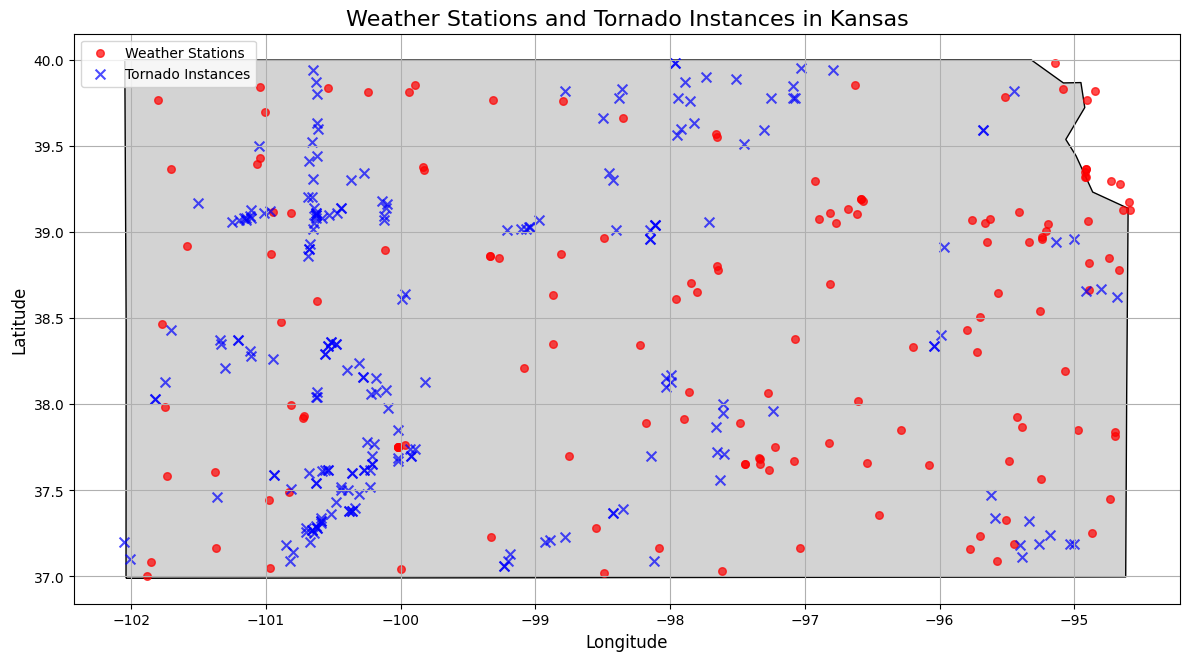

In [50]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Assuming your DataFrames are named 'kansas_stations' and 'kansas_tornadoes'

# Step 1: Convert DataFrames to GeoDataFrames
# Weather Stations
unique_stations = kansas_stations[['station', 'Latitude', 'Longitude']].drop_duplicates()
gdf = gpd.GeoDataFrame(
    unique_stations,
    geometry=gpd.points_from_xy(unique_stations['Longitude'], unique_stations['Latitude']),
    crs="EPSG:4326"
)

# Tornado Instances
tornado_gdf = gpd.GeoDataFrame(
    kansas_tornadoes,
    geometry=gpd.points_from_xy(kansas_tornadoes['LON'], kansas_tornadoes['LAT']),
    crs="EPSG:4326"
)

# Step 2: Load the Kansas map and ensure CRS consistency
kansas_map = gpd.read_file('/Users/evansweeney/Desktop/492_project_local/cmse492_project/data/raw/ne_110m_admin_1_states_provinces/ne_110m_admin_1_states_provinces.shp')

# Identify the correct column to filter Kansas
state_column = None
for col in ['name', 'NAME', 'postal', 'admin']:
    if col in kansas_map.columns:
        state_column = col
        break
if not state_column:
    raise KeyError("No suitable column found for state names.")

# Filter the map for Kansas
if state_column == 'postal':
    kansas_map = kansas_map[kansas_map[state_column] == 'KS']
elif state_column == 'name':
    kansas_map = kansas_map[kansas_map[state_column] == 'Kansas']
elif state_column == 'admin':
    kansas_map = kansas_map[kansas_map[state_column] == 'Kansas']
else:
    kansas_map = kansas_map[kansas_map[state_column] == 'Kansas']

# Ensure CRS match
common_crs = "EPSG:4326"
kansas_map = kansas_map.to_crs(common_crs)
gdf = gdf.to_crs(common_crs)
tornado_gdf = tornado_gdf.to_crs(common_crs)

# Step 3: Plot the map with weather stations and tornado instances
fig, ax = plt.subplots(figsize=(12, 10))
kansas_map.plot(ax=ax, color='lightgray', edgecolor='black')

# Plot weather stations
gdf.plot(
    ax=ax,
    color='red',
    markersize=30,
    label='Weather Stations',
    marker='o',
    alpha=0.7
)

# Plot tornado instances
tornado_gdf.plot(
    ax=ax,
    color='blue',
    markersize=50,
    label='Tornado Instances',
    marker='x',
    alpha=0.7
)

# Customize the plot
plt.title('Weather Stations and Tornado Instances in Kansas', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


# Investigating a Single station with time series analysis

In [51]:
file_path_2 = "/Users/evansweeney/Desktop/492_project_local/cmse492_project/data/processed/merged_data.csv"
quick = pd.read_csv(file_path_2)
print(quick)

                 ID  YEAR/MONTH/DAY ELEMENT  DATA VALUE M-FLAG Q-FLAG S-FLAG  \
0       USW00093909        20150101    TMAX          11    NaN    NaN      W   
1       USW00093909        20150101    TMIN         -93    NaN    NaN      W   
2       USW00093909        20150101    PRCP           0    NaN    NaN      W   
3       USW00093909        20150101    AWND          47    NaN    NaN      W   
4       USW00093909        20150101    WDF2         210    NaN    NaN      W   
...             ...             ...     ...         ...    ...    ...    ...   
206668  USC00148946        20151231    TMIN         -78    NaN    NaN      7   
206669  USC00148946        20151231    TOBS         -67    NaN    NaN      7   
206670  USC00148946        20151231    PRCP           0    NaN    NaN      7   
206671  USC00148946        20151231    SNOW           0    NaN    NaN      7   
206672  USC00148946        20151231    SNWD           0    NaN    NaN      7   

        OBS-TIME  Latitude  Longitude  

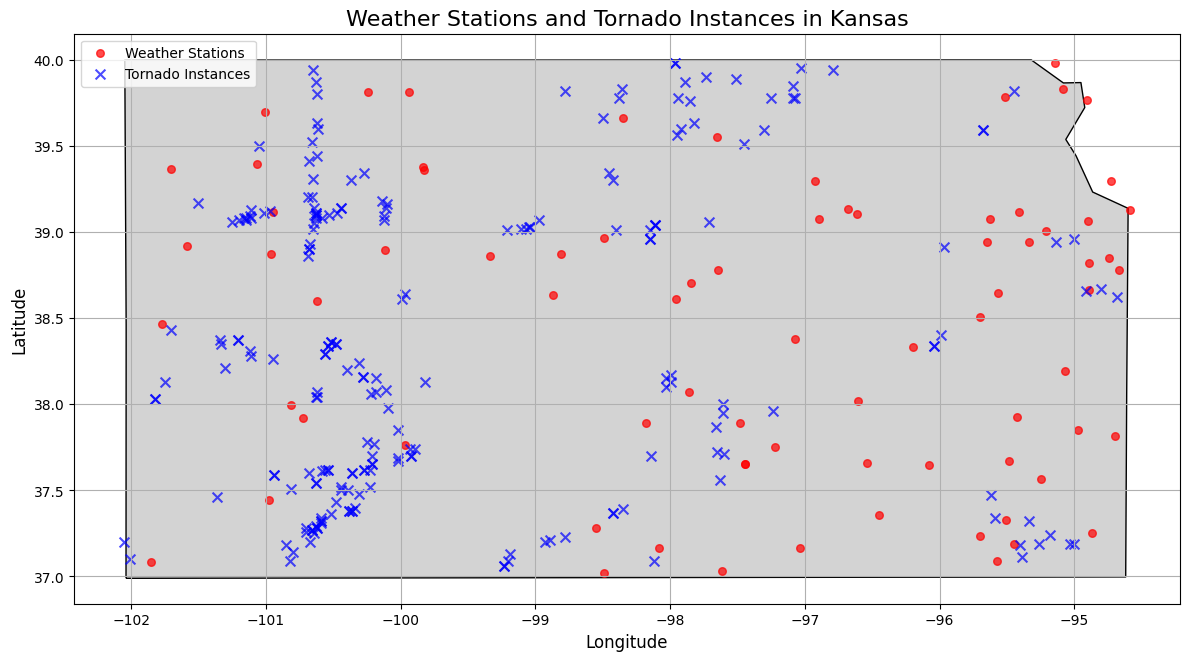

In [52]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Assuming your DataFrames are named 'kansas_stations' and 'kansas_tornadoes'

# Step 1: Convert DataFrames to GeoDataFrames
# Weather Stations
unique_stations = quick[['ID', 'Latitude', 'Longitude']].drop_duplicates()
gdf = gpd.GeoDataFrame(
    unique_stations,
    geometry=gpd.points_from_xy(unique_stations['Longitude'], unique_stations['Latitude']),
    crs="EPSG:4326"
)

# Tornado Instances
tornado_gdf = gpd.GeoDataFrame(
    kansas_tornadoes,
    geometry=gpd.points_from_xy(kansas_tornadoes['LON'], kansas_tornadoes['LAT']),
    crs="EPSG:4326"
)

# Step 2: Load the Kansas map and ensure CRS consistency
kansas_map = gpd.read_file('/Users/evansweeney/Desktop/492_project_local/cmse492_project/data/raw/ne_110m_admin_1_states_provinces/ne_110m_admin_1_states_provinces.shp')

# Identify the correct column to filter Kansas
state_column = None
for col in ['name', 'NAME', 'postal', 'admin']:
    if col in kansas_map.columns:
        state_column = col
        break
if not state_column:
    raise KeyError("No suitable column found for state names.")

# Filter the map for Kansas
if state_column == 'postal':
    kansas_map = kansas_map[kansas_map[state_column] == 'KS']
elif state_column == 'name':
    kansas_map = kansas_map[kansas_map[state_column] == 'Kansas']
elif state_column == 'admin':
    kansas_map = kansas_map[kansas_map[state_column] == 'Kansas']
else:
    kansas_map = kansas_map[kansas_map[state_column] == 'Kansas']

# Ensure CRS match
common_crs = "EPSG:4326"
kansas_map = kansas_map.to_crs(common_crs)
gdf = gdf.to_crs(common_crs)
tornado_gdf = tornado_gdf.to_crs(common_crs)

# Step 3: Plot the map with weather stations and tornado instances
fig, ax = plt.subplots(figsize=(12, 10))
kansas_map.plot(ax=ax, color='lightgray', edgecolor='black')

# Plot weather stations
gdf.plot(
    ax=ax,
    color='red',
    markersize=30,
    label='Weather Stations',
    marker='o',
    alpha=0.7
)

# Plot tornado instances
tornado_gdf.plot(
    ax=ax,
    color='blue',
    markersize=50,
    label='Tornado Instances',
    marker='x',
    alpha=0.7
)

# Customize the plot
plt.title('Weather Stations and Tornado Instances in Kansas', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

In [53]:
import pandas as pd
import geopandas as gpd

# Step 1: Reproject to a Projected CRS (e.g., UTM zone 14N for Kansas)
projected_crs = 'EPSG:26914'  # NAD83 / UTM zone 14N
gdf_projected = gdf.to_crs(projected_crs)
tornado_gdf_projected = tornado_gdf.to_crs(projected_crs)

# Step 2: Perform Nearest Neighbor Spatial Join
joined = gpd.sjoin_nearest(
    tornado_gdf_projected, 
    gdf_projected[['ID', 'geometry']],  # Include only necessary columns
    how='left', 
    distance_col='distance'
)

# Step 3: Count the Number of Times Each Weather Station is Nearest to a Tornado
station_counts = joined['ID'].value_counts()

# Step 4: Identify the Top 5 Weather Stations
top_5_stations = station_counts.head(5)
print("Top 5 Weather Stations Nearest to the Most Tornadoes:")
print(top_5_stations)

# Optional: Get the details of the top 5 stations
top_5_station_details = gdf[gdf['ID'].isin(top_5_stations.index)]
print("\nDetails of the Top 5 Weather Stations:")
print(top_5_station_details)


Top 5 Weather Stations Nearest to the Most Tornadoes:
ID
USC00147922    29
USW00013985    29
USC00145888    23
USW00013984    14
USW00003957    10
Name: count, dtype: int64

Details of the Top 5 Weather Stations:
              ID  Latitude  Longitude                   geometry
99   USW00013984   39.5514   -97.6508   POINT (-97.6508 39.5514)
117  USW00013985   37.7608   -99.9689   POINT (-99.9689 37.7608)
257  USW00003957   37.2839   -98.5528   POINT (-98.5528 37.2839)
326  USC00145888   39.1130  -100.9447   POINT (-100.9447 39.113)
493  USC00147922   37.4415  -100.9793  POINT (-100.9793 37.4415)


In [55]:
usc_station_path = '/Users/evansweeney/Desktop/492_project_local/cmse492_project/data/raw/GHCNh_USC00147922_por.psv'
USC00147922 = pd.read_csv(usc_station_path, sep='|', low_memory=False)


In [63]:
print(USC00147922.columns.tolist())
print(USC00147922.dtypes.tolist())

['Station_ID', 'Station_name', 'Year', 'Month', 'Day', 'Hour', 'Minute', 'Latitude', 'Longitude', 'Elevation', 'temperature', 'temperature_Measurement_Code', 'temperature_Quality_Code', 'temperature_Report_Type', 'temperature_Source_Code', 'temperature_Source_Station_ID', 'dew_point_temperature', 'dew_point_temperature_Measurement_Code', 'dew_point_temperature_Quality_Code', 'dew_point_temperature_Report_Type', 'dew_point_temperature_Source_Code', 'dew_point_temperature_Source_Station_ID', 'station_level_pressure', 'station_level_pressure_Measurement_Code', 'station_level_pressure_Quality_Code', 'station_level_pressure_Report_Type', 'station_level_pressure_Source_Code', 'station_level_pressure_Source_Station_ID', 'sea_level_pressure', 'sea_level_pressure_Measurement_Code', 'sea_level_pressure_Quality_Code', 'sea_level_pressure_Report_Type', 'sea_level_pressure_Source_Code', 'sea_level_pressure_Source_Station_ID', 'wind_direction', 'wind_direction_Measurement_Code', 'wind_direction_Qual

In [69]:
# Filter and print rows where 'temperature' is not NaN
print(USC00147922[USC00147922['wind_speed'].notna()])

Empty DataFrame
Columns: [Station_ID, Station_name, Year, Month, Day, Hour, Minute, Latitude, Longitude, Elevation, temperature, temperature_Measurement_Code, temperature_Quality_Code, temperature_Report_Type, temperature_Source_Code, temperature_Source_Station_ID, dew_point_temperature, dew_point_temperature_Measurement_Code, dew_point_temperature_Quality_Code, dew_point_temperature_Report_Type, dew_point_temperature_Source_Code, dew_point_temperature_Source_Station_ID, station_level_pressure, station_level_pressure_Measurement_Code, station_level_pressure_Quality_Code, station_level_pressure_Report_Type, station_level_pressure_Source_Code, station_level_pressure_Source_Station_ID, sea_level_pressure, sea_level_pressure_Measurement_Code, sea_level_pressure_Quality_Code, sea_level_pressure_Report_Type, sea_level_pressure_Source_Code, sea_level_pressure_Source_Station_ID, wind_direction, wind_direction_Measurement_Code, wind_direction_Quality_Code, wind_direction_Report_Type, wind_direc

In [64]:
# Define the useful columns
useful_columns = [
    'Year', 'Month', 'Day', 'Hour', 'Minute', 'Latitude', 'Longitude', 'Elevation',
    'temperature', 'dew_point_temperature', 'station_level_pressure', 'sea_level_pressure',
    'wind_direction', 'wind_speed', 'wind_gust', 'precipitation', 'relative_humidity', 'wet_bulb_temperature'
]

# Filter the DataFrame for the year 2015 and select the useful columns
USC00147922_filtered = USC00147922[USC00147922['Year'] == 2015][useful_columns]

# Display the filtered DataFrame
print(USC00147922_filtered)

        Year  Month  Day  Hour  Minute  Latitude  Longitude  Elevation  \
429002  2015      1    1     0       0   37.4415  -100.9793      898.9   
429003  2015      1    1     1       0   37.4415  -100.9793      898.9   
429004  2015      1    1     2       0   37.4415  -100.9793      898.9   
429005  2015      1    1     3       0   37.4415  -100.9793      898.9   
429006  2015      1    1     4       0   37.4415  -100.9793      898.9   
...      ...    ...  ...   ...     ...       ...        ...        ...   
437757  2015     12   31    19       0   37.4415  -100.9793      898.9   
437758  2015     12   31    20       0   37.4415  -100.9793      898.9   
437759  2015     12   31    21       0   37.4415  -100.9793      898.9   
437760  2015     12   31    22       0   37.4415  -100.9793      898.9   
437761  2015     12   31    23       0   37.4415  -100.9793      898.9   

        temperature  dew_point_temperature  station_level_pressure  \
429002          NaN                    Na

In [66]:
print(USC00147922_filtered['temperature'].mean)

<bound method Series.mean of 429002   NaN
429003   NaN
429004   NaN
429005   NaN
429006   NaN
          ..
437757   NaN
437758   NaN
437759   NaN
437760   NaN
437761   NaN
Name: temperature, Length: 8760, dtype: float64>
